In [1]:
import sys
sys.path.append('../wec-grid-code') # 
import wec_grid_class as wg
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = (15,10)

    Sets PSSE environment to latest minor version among installed versions of PSSE 35.
    Use psse35.set_minor(n) to set PSSE35 minor version (n) to use.
        Example, for PSSE 35.0.x, use this as: psse35.set_minor(0)

 Input error detected at !
 -m ipykernel_launcher -f C:\Users\barajale\AppData\Roaming\jupyter\runtime\kernel-7a46fabb-2d4e-45a6-86e3-aa5cc0a0e878.json
                          !

 PSS(R)E Xplore Version 35
 Copyright (c) 1976-2022
 Siemens Industry, Inc.,
 Power Technologies International                            (PTI)
 This program is a confidential  unpublished  work  created  and  first
 licensed in 1976.  It is a trade secret which is the property of  PTI.
 All use,  disclosure,  and/or reproduction not specifically authorized
 by  PTI  is prohibited.   This  program is protected  under  copyright
 laws  of  non-U.S.  countries  and  by  application  of  international
 treaties.  All  Rights  Reserved  Under  The  Copyright  Laws.


           SIEMENS POWER T

In [2]:
# Read in case file 
case14 = r"../input_files/case14.raw"

In [3]:
# initalize WEC GRID Object
pf = wg.Wec_grid(case14,"DC",3)


 Reading IC, SBASE, REV, XFRRAT, NXFRAT, BASFRQ...

 Converting RAW data from PSS(R)E 33 to PSS(R)E 34 format
 Starting processing of Case identification data records
 Finished processing of 3 records for Case identification data
 Starting processing of Bus data records
 Finished processing of 14 records for Bus data
 Starting processing of Load data records
 Finished processing of 11 records for Load data
 Starting processing of Fixed shunt data records
 Finished processing of 1 records for Fixed shunt data
 Starting processing of Generator data records
 Finished processing of 5 records for Generator data
 Starting processing of Branch data records
 Finished processing of 17 records for Branch data
 Finished processing of 0 records for System switching device data
 Starting processing of Transformer data records
 Finished processing of 12 records for 3 Transformer data
 Starting processing of Area data records
 Finished processing of 0 records for Area data
 Starting processing of Tw

In [4]:
pf.dataframe

,BUS_ID,Bus,BASE,PU,ANGLED,Type,P Gen,Q Gen,P Load,Q Load,P,Q
0,1,BUS 1,0.0,1.060,0.000000,3,232.399994,-16.900000,NaN,NaN,232.399994,-16.900000
1,2,BUS 2,0.0,1.045,-5.183665,2,40.000000,42.400002,21.700001,12.700001,18.299999,29.700001
2,3,BUS 3,0.0,1.010,-13.134289,2,0.000000,23.400000,94.199997,19.000000,-94.199997,4.400000
3,4,BUS 4,0.0,1.019,-10.772042,1,NaN,NaN,47.799999,-3.900000,-47.799999,3.900000
4,5,BUS 5,0.0,1.020,-9.257074,1,NaN,NaN,7.600000,1.600000,-7.600000,-1.600000
5,6,BUS 6,0.0,1.070,-15.381474,2,0.000000,12.200000,11.200000,7.500000,-11.200000,4.699999
6,7,BUS 7,0.0,1.062,-14.261211,1,NaN,NaN,NaN,NaN,NaN,NaN
7,8,BUS 8,0.0,1.090,-14.261210,2,0.000000,17.400000,NaN,NaN,0.000000,17.400000
8,9,BUS 9,0.0,1.056,-16.096729,1,NaN,NaN,29.499998,16.600000,-29.499998,-16.600000
9,10,BUS 10,0.0,1.051,-16.399057,1,NaN,NaN,9.000000,5.800000,-9.000000,-5.800000


In [6]:
injection_file = ('../input_files/WECgen_data.csv')
injection = pd.read_csv(injection_file)

for i in range(len(injection)):
    print("Time: {}".format(injection.iloc[i].time))
    print("P setpoint: {}".format(injection.pg.iloc[i]))

    pf.dc_injection(pf.wecBus_num, injection.pg.iloc[i], pf.solver, injection.iloc[i].time)
    print("========================")

Time: 0.0
P setpoint: nan

 No power flow data changed for machine "1" at bus 3 [BUS 3             ]

 The working case has a largest mismatch of 10.02 MW at bus 1 [BUS 1             ]
                              PTI INTERACTIVE POWER SYSTEM SIMULATOR--PSS(R)E Xplore TUE, OCT 11 2022  16:46



 X----------- FROM BUS -----------X   BASE CHANGE    GEN.    LOAD X------------ TO BUS ------------X         BASE CASE    RATE1    CHANGE CASE   DELTA
   BUS#-SCT X-- NAME --X BASKV AREA  ANGLE  ANGLE     MW      MW    BUS#-SCT X-- NAME --X BASKV AREA CKT     MW      MVA     MW      MW
      1     BUS 1                 1    0.0          233.6     0.0 --------------------------------------------------------------------------------
                                                                       2     BUS 2                 1  1    158.0
                                                                       5     BUS 5                 1  1     75.6
      2     BUS 2                 1   -5.2 

Time: 5400.0
P setpoint: 0.0207996344375846

 Power flow data changed for machine "1" at bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.243169E-01    0.207996E-01  PG

 The working case has a largest mismatch of 10.02 MW at bus 1 [BUS 1             ]
                              PTI INTERACTIVE POWER SYSTEM SIMULATOR--PSS(R)E Xplore TUE, OCT 11 2022  16:46



 X----------- FROM BUS -----------X   BASE CHANGE    GEN.    LOAD X------------ TO BUS ------------X         BASE CASE    RATE1    CHANGE CASE   DELTA
   BUS#-SCT X-- NAME --X BASKV AREA  ANGLE  ANGLE     MW      MW    BUS#-SCT X-- NAME --X BASKV AREA CKT     MW      MVA     MW      MW
      1     BUS 1                 1    0.0          233.6     0.0 --------------------------------------------------------------------------------
                                                                       2     BUS 2                 1  1    157.9
                                                             

Time: 10800.0
P setpoint: 0.0218964852837562

 Power flow data changed for machine "1" at bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.171981E-01    0.218965E-01  PG

 The working case has a largest mismatch of 10.02 MW at bus 1 [BUS 1             ]
                              PTI INTERACTIVE POWER SYSTEM SIMULATOR--PSS(R)E Xplore TUE, OCT 11 2022  16:46



 X----------- FROM BUS -----------X   BASE CHANGE    GEN.    LOAD X------------ TO BUS ------------X         BASE CASE    RATE1    CHANGE CASE   DELTA
   BUS#-SCT X-- NAME --X BASKV AREA  ANGLE  ANGLE     MW      MW    BUS#-SCT X-- NAME --X BASKV AREA CKT     MW      MVA     MW      MW
      1     BUS 1                 1    0.0          233.6     0.0 --------------------------------------------------------------------------------
                                                                       2     BUS 2                 1  1    157.9
                                                            

Time: 15600.0
P setpoint: 0.0224721665382405

 Power flow data changed for machine "1" at bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.203198E-01    0.224722E-01  PG

 The working case has a largest mismatch of 10.02 MW at bus 1 [BUS 1             ]
                              PTI INTERACTIVE POWER SYSTEM SIMULATOR--PSS(R)E Xplore TUE, OCT 11 2022  16:46



 X----------- FROM BUS -----------X   BASE CHANGE    GEN.    LOAD X------------ TO BUS ------------X         BASE CASE    RATE1    CHANGE CASE   DELTA
   BUS#-SCT X-- NAME --X BASKV AREA  ANGLE  ANGLE     MW      MW    BUS#-SCT X-- NAME --X BASKV AREA CKT     MW      MVA     MW      MW
      1     BUS 1                 1    0.0          233.6     0.0 --------------------------------------------------------------------------------
                                                                       2     BUS 2                 1  1    157.9
                                                            

Time: 20700.0
P setpoint: 0.0171969942873342

 Power flow data changed for machine "1" at bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.213648E-01    0.171970E-01  PG

 The working case has a largest mismatch of 10.02 MW at bus 1 [BUS 1             ]
                              PTI INTERACTIVE POWER SYSTEM SIMULATOR--PSS(R)E Xplore TUE, OCT 11 2022  16:46



 X----------- FROM BUS -----------X   BASE CHANGE    GEN.    LOAD X------------ TO BUS ------------X         BASE CASE    RATE1    CHANGE CASE   DELTA
   BUS#-SCT X-- NAME --X BASKV AREA  ANGLE  ANGLE     MW      MW    BUS#-SCT X-- NAME --X BASKV AREA CKT     MW      MVA     MW      MW
      1     BUS 1                 1    0.0          233.6     0.0 --------------------------------------------------------------------------------
                                                                       2     BUS 2                 1  1    158.0
                                                            

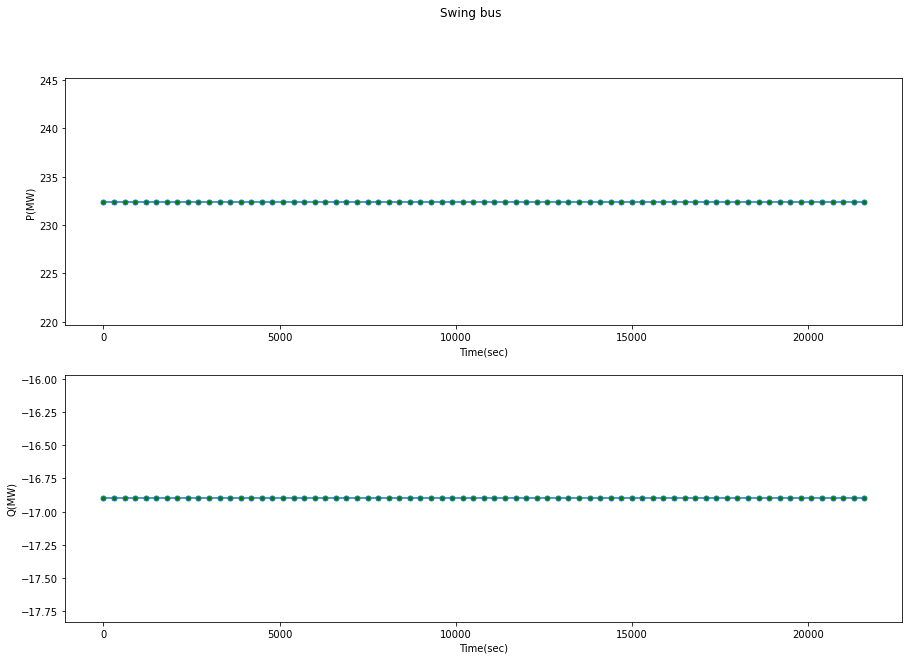

In [7]:
pf.plotSwingBus()

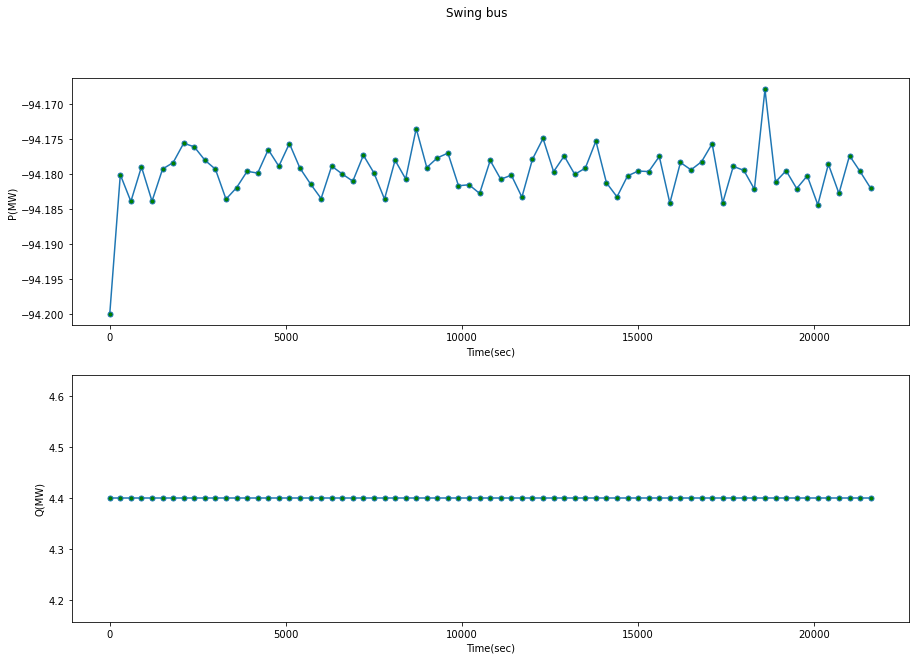

In [8]:
pf.plotWecBus()